In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.5.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)
print(train_labels)

[9 0 0 ... 3 0 5]


In [9]:
train_labels.shape

(60000,)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

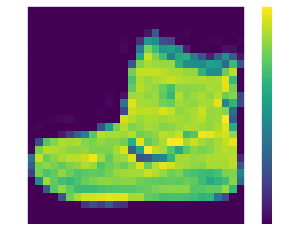

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

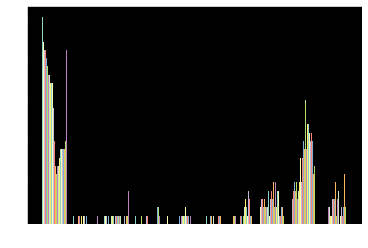

In [15]:
_ = plt.hist(train_images[0])

In [16]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

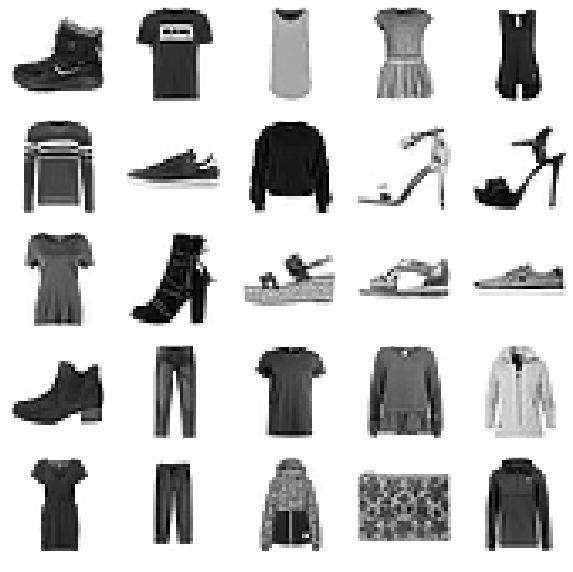

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_scaled[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, 'softmax')
])

In [19]:
print(train_labels.shape)
print(train_labels[0])

(60000,)
9


In [20]:
train_labels_categorical = keras.utils.to_categorical(train_labels)
test_labels_categorical = keras.utils.to_categorical(test_labels)

In [21]:
model.compile(optimizer='adam',
              loss = keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [22]:
model.fit(train_images_scaled, train_labels_categorical, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4964 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3708 - accuracy: 0.8671
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3337 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3098 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2483 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [23]:
test_loss, test_accuracy = model.evaluate(test_images_scaled, test_labels_categorical, verbose=2)
print(f'Test accuracy: {test_accuracy}')

313/313 - 0s - loss: 0.3359 - accuracy: 0.8812
Test accuracy: 0.8812000155448914


In [24]:
predictions = model.predict(test_images)

In [25]:
print(class_names[np.argmax(predictions[0])])

Ankle boot
